<a href="https://colab.research.google.com/github/cannin/gsoc_2023_pytorch_pathway_commons/blob/main/Create_graph_structure_from_pathway_commons_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
import numpy as np 
import pandas as pd

In [16]:
path = "/content/drive/MyDrive/PathwayCommons12.reactome.hgnc.sif.gz"  


#specify compression type because the file is compressed
df = pd.read_csv(path, sep="\t", compression="gzip", header=None, names=["Source", "InteractionType", "Target"])

In [17]:
df.head()

,Source,InteractionType,Target
0,A1CF,in-complex-with,APOBEC1
1,A1CF,in-complex-with,APOBEC2
2,A1CF,in-complex-with,APOBEC3A
3,A1CF,in-complex-with,APOBEC3B
4,A1CF,in-complex-with,APOBEC3C


In [18]:
df.shape

(353636, 3)

In [19]:
new_df = df.copy()

In [20]:
new_df = new_df.drop(columns='InteractionType')

In [27]:
new_df.head()

,Source,Target
0,A1CF,APOBEC1
1,A1CF,APOBEC2
2,A1CF,APOBEC3A
3,A1CF,APOBEC3B
4,A1CF,APOBEC3C


In [30]:
new_df.shape

(353636, 2)

In [21]:
# print unique values for each column
identifiers = new_df['Source'].unique()
print(identifiers)

['A1CF' 'A2M' 'A4GNT' ... 'ZWILCH' 'ZWINT' 'ZZZ3']


In [23]:
!pip install networkx

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [24]:
import networkx as nx
import matplotlib.pyplot as plt

In [25]:
# Create a NetworkX graph
graph = nx.from_pandas_edgelist(df, 'Source', 'Target')

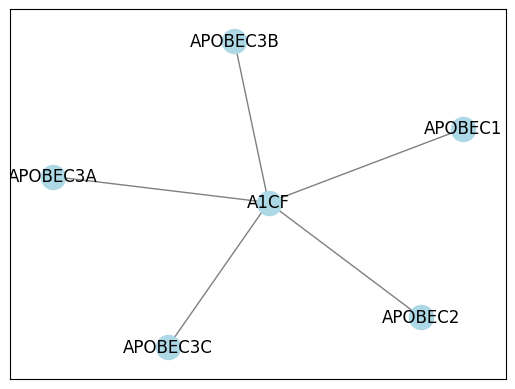

In [26]:
# Create an empty graph
G = nx.Graph()

# Add nodes (sources and targets)
sources = ["A1CF", "A1CF", "A1CF", "A1CF", "A1CF"]
targets = ["APOBEC1", "APOBEC2", "APOBEC3A", "APOBEC3B", "APOBEC3C"]
G.add_edges_from(zip(sources, targets))

# Visualize the graph
pos = nx.spring_layout(G)  # Position the nodes using a spring layout algorithm
nx.draw_networkx(G, pos=pos, with_labels=True, node_color="lightblue", edge_color="gray")
plt.show()

In [ ]:
!pip install torch-geometric

In [29]:
import torch
from torch_geometric.data import Data

In [31]:
source_nodes = df['Source'].tolist()
target_nodes = df['Target'].tolist()

# Create a set of all unique nodes
all_nodes = set(source_nodes + target_nodes)

# Create a dictionary to map each unique node to a unique index
node_to_index = {node: index for index, node in enumerate(all_nodes)}

# Map the source and target nodes to their corresponding indices
source_indices = [node_to_index[node] for node in source_nodes]
target_indices = [node_to_index[node] for node in target_nodes]

In [32]:
# Convert the source and target indices to a PyTorch tensor
edge_index = torch.tensor([source_indices, target_indices], dtype=torch.long)

# Create the graph data object
graph_data = Data(edge_index=edge_index)

In [35]:
graph_data.num_nodes

/usr/local/lib/python3.10/dist-packages/torch_geometric/data/storage.py:304: UserWarning: Unable to accurately infer 'num_nodes' from the attribute set '{'edge_index'}'. Please explicitly set 'num_nodes' as an attribute of 'data' to suppress this warning
  warnings.warn(


12324

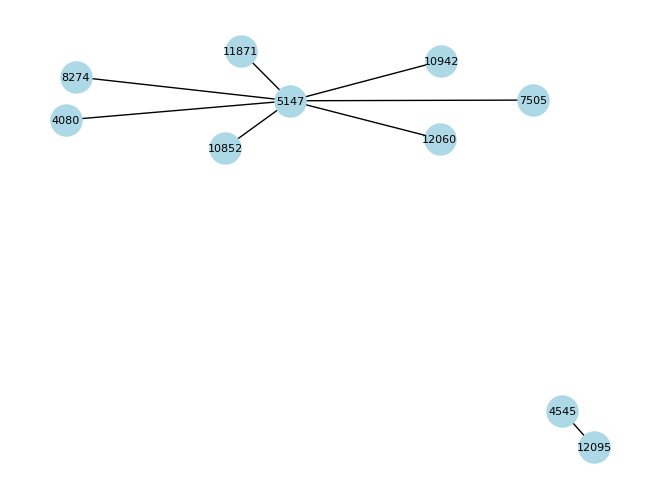

In [34]:
# Convert the edge_index tensor to a list of tuples
edge_list = edge_index.t().tolist()

# Create an empty graph
G = nx.Graph()

# Add the edges to the graph
G.add_edges_from(edge_list)

# Select a subset of nodes to visualize
nodes_to_visualize = list(G.nodes())[:10]

# Create a subgraph with the selected nodes and their adjacent edges
subgraph = G.subgraph(nodes_to_visualize)

# Visualize the subgraph
pos = nx.spring_layout(subgraph)  # Positions of nodes using a spring layout algorithm
nx.draw(subgraph, pos, with_labels=True, node_color='lightblue', node_size=500, font_size=8)
plt.show()